In [6]:
import pandas as pd
from fastai import *
from fastai.vision import *

In [7]:
df = pd.read_csv("./mask_labels.udt.csv")

In [129]:
df = df[df.path.str.contains("samples")]

In [130]:
url_list = [str(a) for a in list(df["imageUrl"])]
open("./images.txt", "w").write("\n".join(url_list))

304850

In [131]:
download_images("./images.txt", "./images", max_pics = 10000)

In [132]:
labels = pd.DataFrame(data={
    "image": (df.index - 1).astype("str").str.zfill(8) + ".jpg",
    "output": df["output"]
})

In [ ]:
failed = verify_images("./images", delete=True)

In [134]:
missing_images = list([img for img in labels["image"] if not(Path("./images") / img).exists()])

In [135]:
labels = labels[~labels["image"].isin(missing_images)]

In [138]:
# Optional: We're going to start with mask/no mask
labels.loc[labels["output"] == "not_medical_mask", "output"] = "mask"
labels.loc[labels["output"] == "medical_mask", "output"] = "mask"

In [140]:
data = ImageDataBunch.from_df(".", labels, folder="images", seed=42,
                              label_col="output", bs=16, size=224,
                              ds_tfms=get_transforms()).normalize(imagenet_stats)

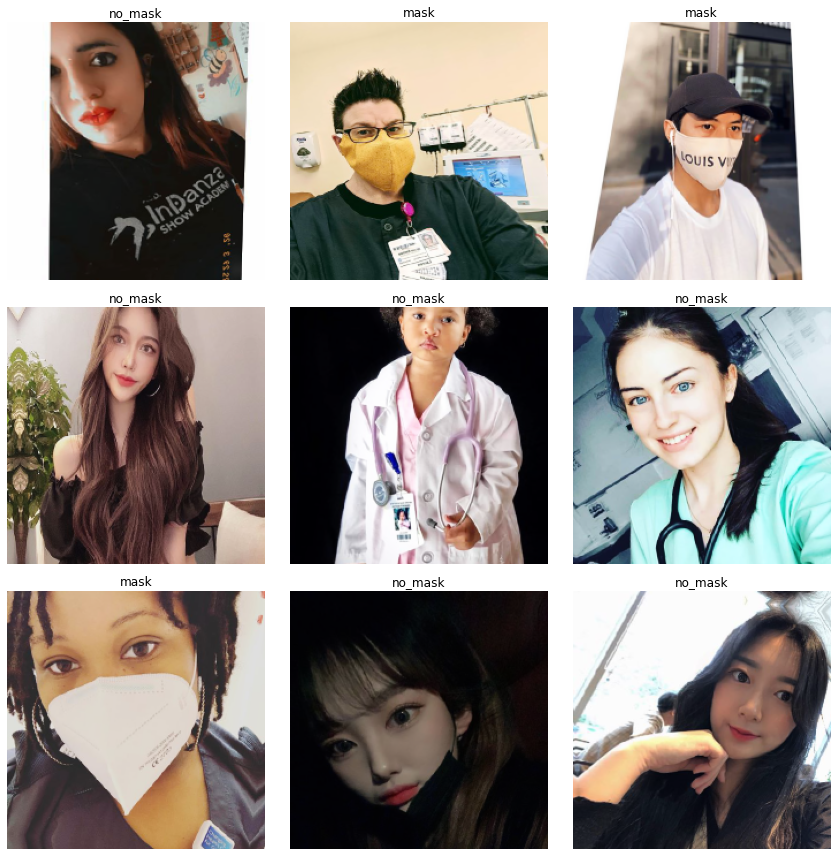

In [141]:
data.show_batch(rows=3)

In [142]:
learn = cnn_learner(data, models.resnet18, metrics=error_rate)

In [143]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.663052,0.327977,0.123348,00:43


In [144]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


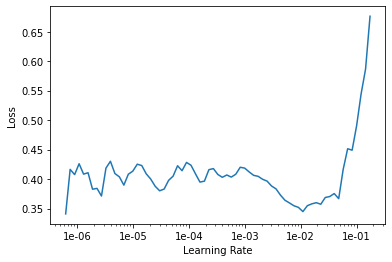

In [145]:
learn.recorder.plot()

In [146]:
learn.save("learn1")

In [147]:
learn.fit_one_cycle(3, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.438952,0.249078,0.088106,00:44
1,0.364104,0.196068,0.070485,00:49
2,0.256575,0.202964,0.070485,00:53


In [148]:
learn.save("learn2")

In [149]:
interp = learn.interpret()

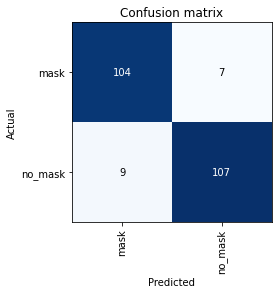

In [150]:
interp.plot_confusion_matrix()

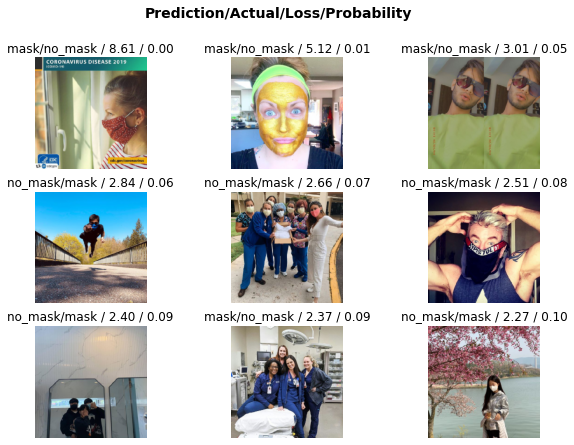

In [155]:
interp.plot_top_losses(9, figsize=(10,7))